In [2]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


##Exploración y Visualización de Datos (EDA)

### Carga y Exploración Inicial de Datos:
* Cargar el dataset y revisar su estructura básica.
* Describir las variables y su distribución.
* Identificar y tratar valores nulos y outliers.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [8]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
# La columna Date esta en formato Object y se debe cambiar a datetime64
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [12]:
df.isnull().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [13]:
df.duplicated().sum()

0

Valores nulos:
 Series([], dtype: int64)


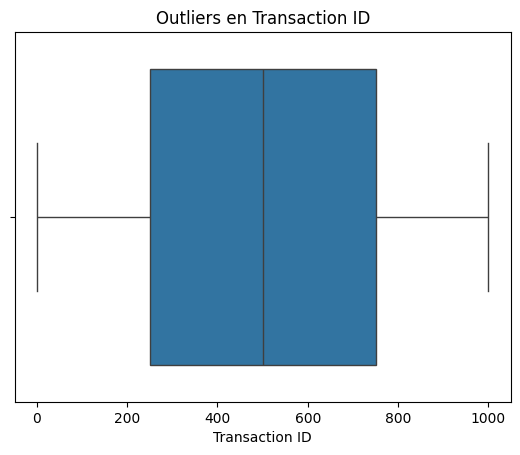

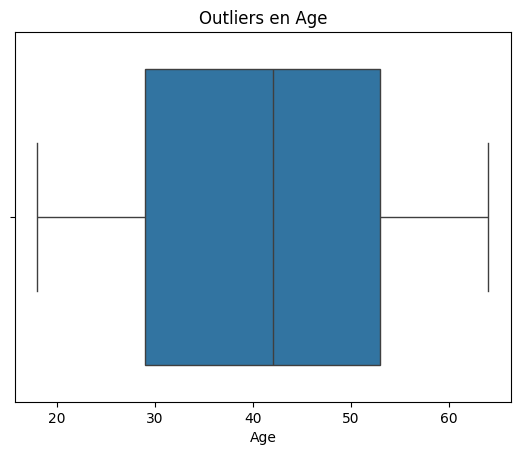

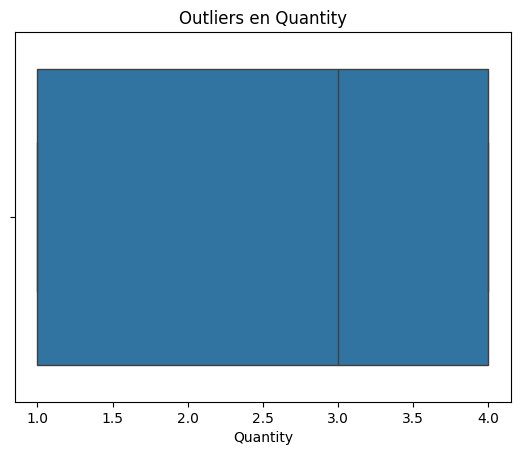

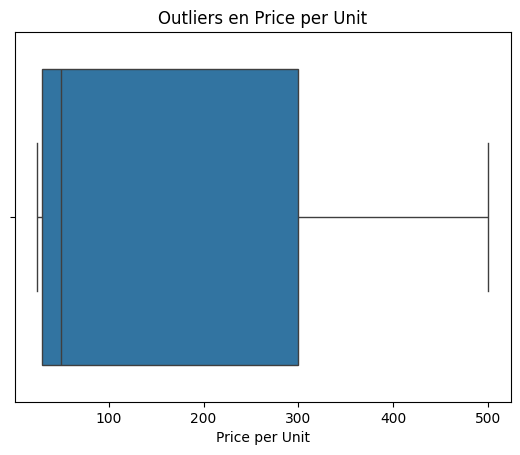

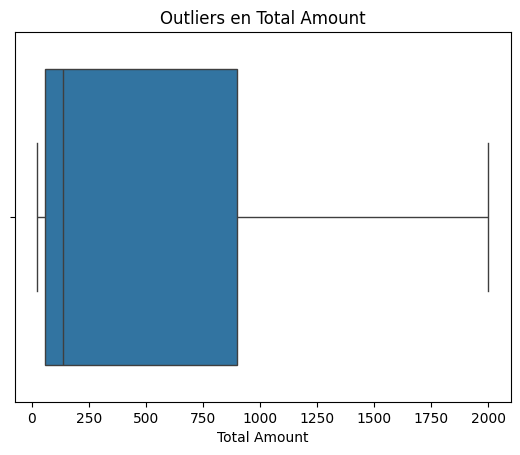

In [14]:
# Valores nulos
missing_values = df.isnull().sum()
print("Valores nulos:\n", missing_values[missing_values > 0])

# Detección de outliers en variables numéricas
num_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in num_features:
    sns.boxplot(x=df[feature])
    plt.title(f"Outliers en {feature}")
    plt.show()


##Análisis de Correlación:
* Realizar un análisis de correlación y crear un mapa de calor para visualizar las relaciones entre las variables.

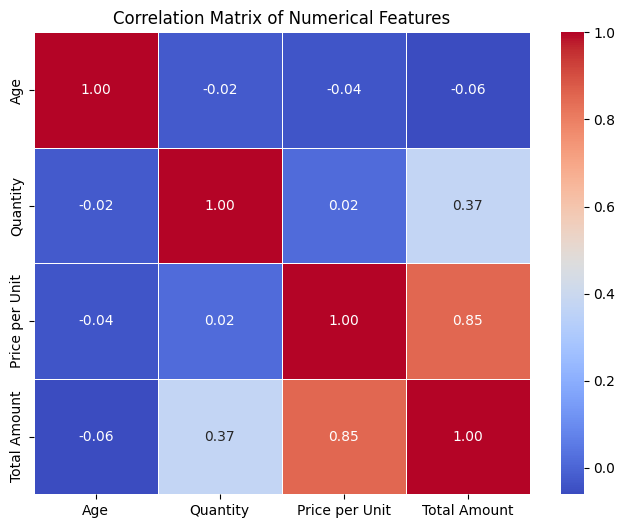

In [15]:
# Realizar un análisis de correlación
# y crear un mapa de calor para visualizar las relaciones entre las variables.

# Convert relevant columns to numeric if they are not already
for col in ['Age', 'Quantity', 'Price per Unit', 'Total Amount']:
    if not pd.api.types.is_numeric_dtype(df[col]):
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Could not convert {col} to numeric. Check for non-numeric values.")

# Select numerical features for correlation analysis
numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()


# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Visualización de Datos:
* Crear subplots para comparar diferentes variables clave.
* Añadir cuadrículas, leyendas, anotaciones y flechas a los gráficos para mejorar la claridad y la información.

<ipython-input-50-388afe253cab>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Product Category", y="Total Amount", ax=axes[1], palette="Set2")


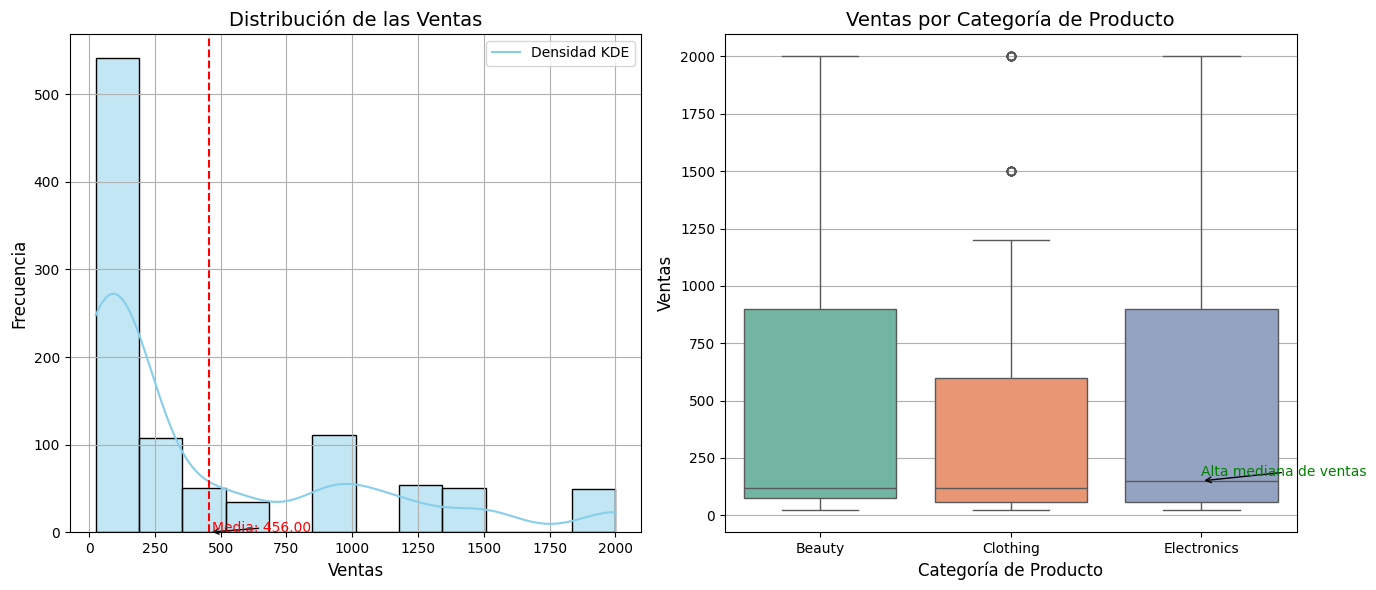

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Distribución de las ventas
sns.histplot(df['Total Amount'], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de las Ventas", fontsize=14)
axes[0].set_xlabel("Ventas", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)
axes[0].grid(True)  # Agregar cuadrícula
axes[0].legend(["Densidad KDE"], loc="upper right")

# Anotar valor medio
mean_sales = df['Total Amount'].mean()
axes[0].axvline(mean_sales, color="red", linestyle="--", linewidth=1.5)
axes[0].annotate(f"Media: {mean_sales:.2f}", xy=(mean_sales, 0.1),
                 xytext=(mean_sales + 10, 0.15),  # Ajustar según la escala
                 arrowprops=dict(facecolor="red", arrowstyle="->"),
                 fontsize=10, color="red")

# Comparación de ventas por categoría de producto
sns.boxplot(data=df, x="Product Category", y="Total Amount", ax=axes[1], palette="Set2")
axes[1].set_title("Ventas por Categoría de Producto", fontsize=14)
axes[1].set_xlabel("Categoría de Producto", fontsize=12)
axes[1].set_ylabel("Ventas", fontsize=12)
axes[1].grid(axis='y')  # Cuadrícula solo en el eje y para claridad

# Anotar una categoría con alta mediana de ventas
high_sales_category = df.groupby("Product Category")["Total Amount"].median().idxmax()
high_sales_value = df.groupby("Product Category")["Total Amount"].median().max()
axes[1].annotate(f"Alta mediana de ventas",
                 xy=(high_sales_category, high_sales_value),
                 xytext=(high_sales_category, high_sales_value + 20),  # Ajustar según la escala
                 arrowprops=dict(facecolor="green", arrowstyle="->"),
                 fontsize=10, color="green")

# Ajustar el diseño para que no se superpongan los gráficos
plt.tight_layout()
plt.show()


#Parte 2: Preprocesamiento de Datos

###Transformación de Columnas:
* Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.
* Realizar codificación de variables categóricas y escalado de variables numéricas.
###Pipelines:
* Crear pipelines para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.


In [16]:
# Separar características y objetivo
X = df.drop("Total Amount", axis=1)
y = df["Total Amount"]

# Identificar variables numéricas y categóricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Transformaciones específicas de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [18]:
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}


#Parte 3: Benchmarking de Técnicas de Machine Learning
###Selección de Modelos:
* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

###Comparación de Modelos:
* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Seleccionar el mejor modelo basado en las métricas obtenidas.


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# definir X y Y
X = df.drop("Total Amount", axis=1)
y = df["Total Amount"]

# Identificar variables numéricas y categóricas
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

# Configurar el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)  # Configuración modificada aquí
    ])

# Crear pipelines para cada modelo y aplicar la validación cruzada
models = {
    "Linear Regression": LinearRegression(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}

# Evaluación de cada modelo usando validación cruzada
results = []
for model_name, model in models.items():
    try:
        # Crear pipeline para cada modelo
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Validación cruzada y métricas de desempeño (MSE, R2)
        mse_scores = -cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

        results.append({
            'Model': model_name,
            'MSE': mse_scores.mean(),
            'R2': r2_scores.mean()
        })
    except Exception as e:
        print(f"Error con el modelo {model_name}: {e}")

# Convertir resultados a DataFrame para ver los mejores modelos
results_df = pd.DataFrame(results)
display(results_df.sort_values(by="MSE"))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 9
[LightGBM] [Info] Start training from score 460.429688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,MSE,R2
2,Decision Tree,0.000000e+00,1.000000
3,Random Forest,0.000000e+00,1.000000
4,XGBoost,2.069838e-08,1.000000
5,LightGBM,2.254210e-04,1.000000
1,K-Nearest Neighbors,1.830645e+04,0.942499
0,Linear Regression,4.792477e+04,0.844206
